In [1]:
#Import the necessary libraries for the file
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import numpy as np

data = pd.read_csv('data/dermatology.csv')

In [2]:
data

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,ES class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
353,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
354,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
355,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [3]:
data.shape

(357, 35)

In [4]:
class_names = ["psoriasis", "seboreic dermatitis", "lichen planus", "pityriasis rosea", "cronic dermatitis", "pityriasis rubra pilaris"]
n_features = data.shape[1]-1

In [5]:
#Split the dataset to train the algorithms

from sklearn.model_selection import train_test_split
X_es = data.iloc[:,:-1]
y_es = data.loc[:,"ES class"]

X_train, X_test, y_train, y_test = train_test_split(X_es, y_es, random_state=0)

# **Trees**

## Decision tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

#Tree with random_sate=0
tree = DecisionTreeClassifier(max_depth=6,random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.981
Accuracy on test set: 0.933


In [17]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree_0.dot", class_names=class_names,
 feature_names=tree.feature_names_in_, impurity=False, filled=True)

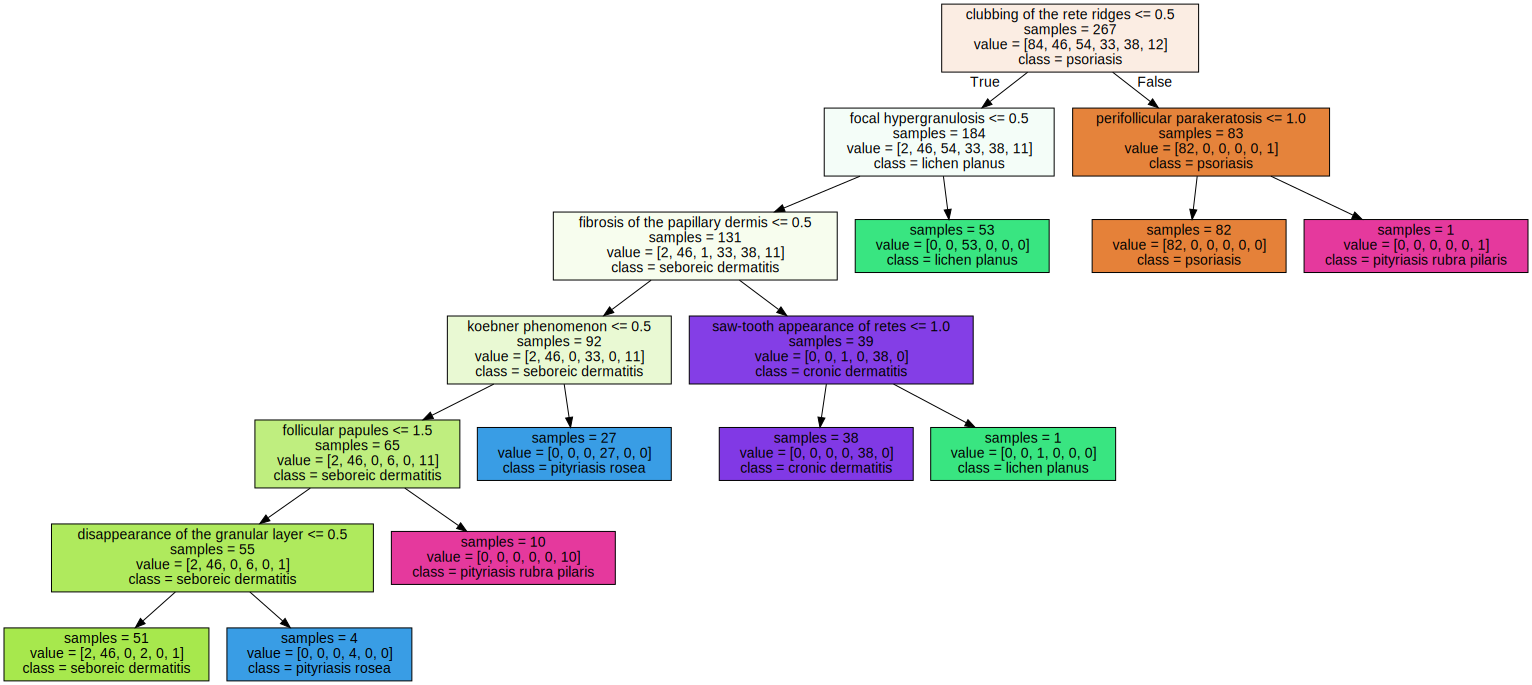

In [18]:
with open("tree_0.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)

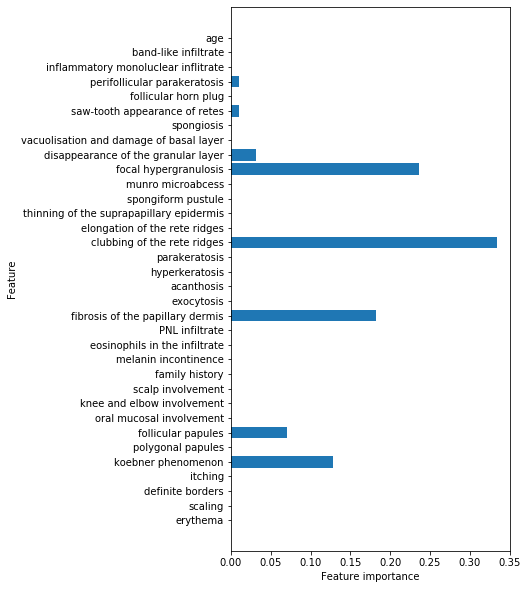

In [19]:
def plot_feature_importances(model):
     plt.figure(figsize=(5, 10))
     plt.barh(range(n_features), model.feature_importances_, align='center')
     plt.yticks(np.arange(n_features), model.feature_names_in_)
     plt.xlabel("Feature importance")
     plt.ylabel("Feature")
plot_feature_importances(tree)

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, X_es, y_es, cv=7)
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.88235294 0.92156863 0.98039216 0.90196078 0.96078431 0.96078431
 0.98039216]
Average cross-validation score: 0.94


In [21]:
#Tree with random_sate=42
tree = DecisionTreeClassifier(max_depth=6,random_state=42)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.981
Accuracy on test set: 0.956


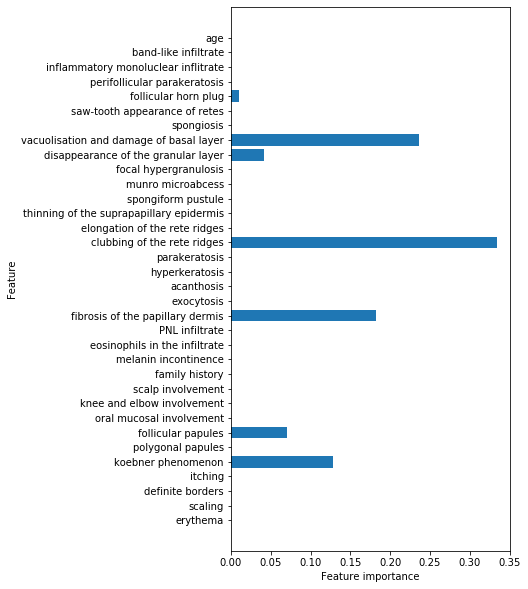

In [22]:
plot_feature_importances(tree)

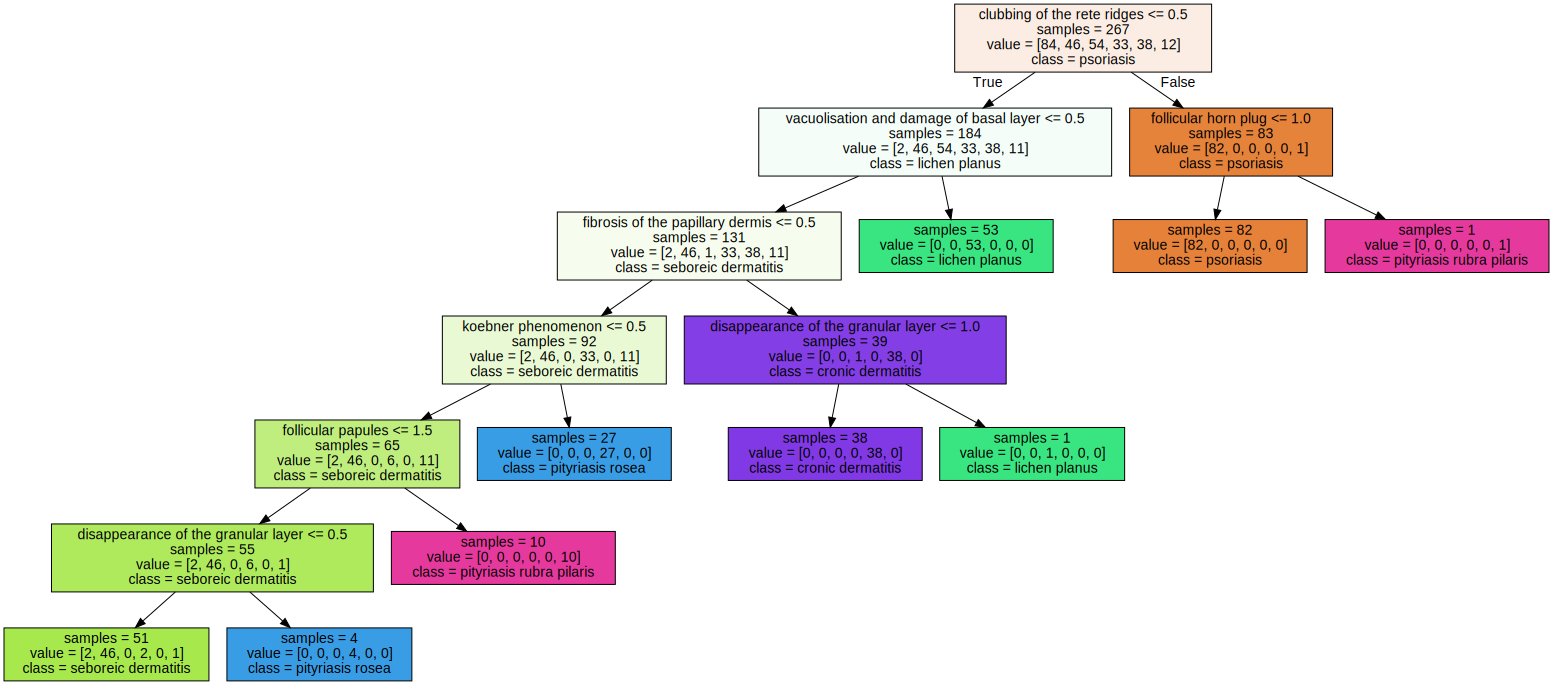

In [23]:
export_graphviz(tree, out_file="tree_42.dot", class_names=class_names,
 feature_names=tree.feature_names_in_, impurity=False, filled=True)

with open("tree_42.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)

In [24]:
scores = cross_val_score(tree, X_es, y_es, cv=7)
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.90196078 0.92156863 0.94117647 0.90196078 0.96078431 0.98039216
 0.98039216]
Average cross-validation score: 0.94


## Random forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

forest_10 = RandomForestClassifier(n_estimators=10, max_depth=6, random_state=0)
forest_10.fit(X_train, y_train)
forest_100 = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=0)
forest_100.fit(X_train, y_train)
forest_500 = RandomForestClassifier(n_estimators=500, max_depth=6, random_state=0)
forest_500.fit(X_train, y_train)
forest_1200 = RandomForestClassifier(n_estimators=1200, max_depth=6, random_state=0)
forest_1200.fit(X_train, y_train)
print("Accuracy on training set with 10 trees: {:.3f}".format(forest_10.score(X_train, y_train)))
print("Accuracy on test set with 10 trees: {:.3f}".format(forest_10.score(X_test, y_test)))
print("Accuracy on training set with 100 trees: {:.3f}".format(forest_100.score(X_train, y_train)))
print("Accuracy on test set with 100 trees: {:.3f}".format(forest_100.score(X_test, y_test)))
print("Accuracy on training set with 500 trees: {:.3f}".format(forest_500.score(X_train, y_train)))
print("Accuracy on test set with 500 trees: {:.3f}".format(forest_500.score(X_test, y_test)))
print("Accuracy on training set with 1200 trees: {:.3f}".format(forest_1200.score(X_train, y_train)))
print("Accuracy on test set with 1200 trees: {:.3f}".format(forest_1200.score(X_test, y_test)))

Accuracy on training set with 10 trees: 0.989
Accuracy on test set with 10 trees: 0.967
Accuracy on training set with 100 trees: 0.989
Accuracy on test set with 100 trees: 0.956
Accuracy on training set with 500 trees: 0.989
Accuracy on test set with 500 trees: 0.956
Accuracy on training set with 1200 trees: 0.989
Accuracy on test set with 1200 trees: 0.956


## Cross Validation

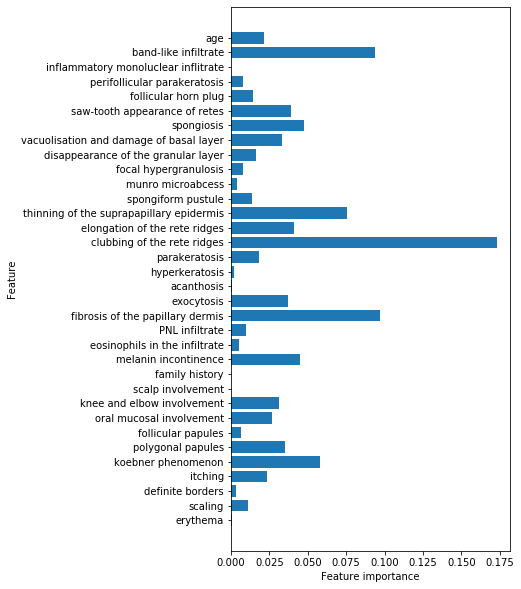

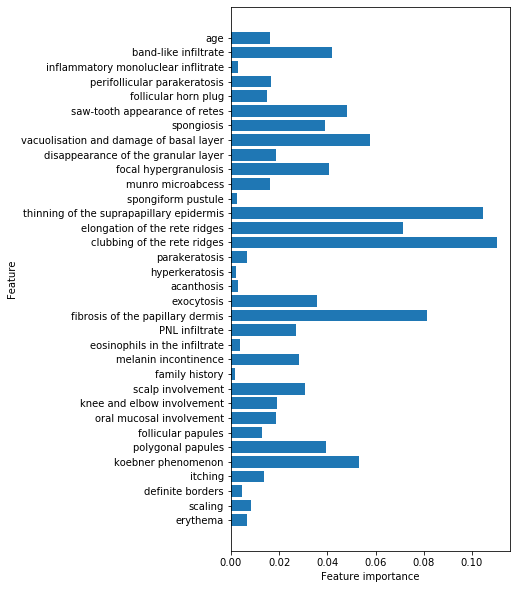

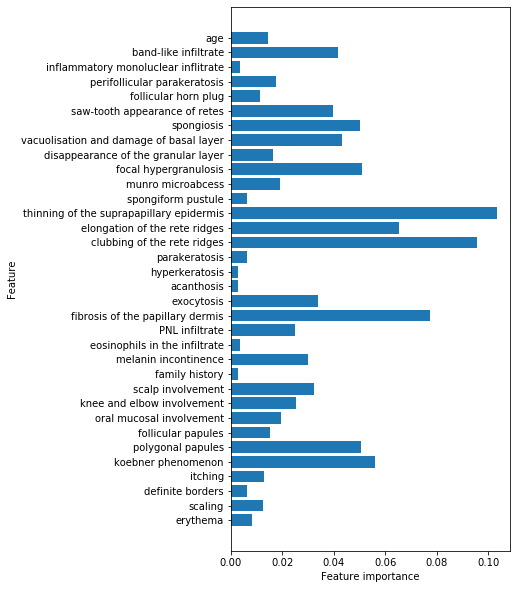

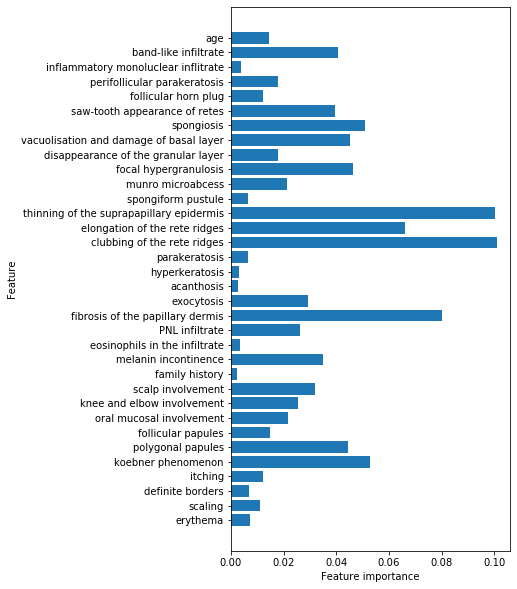

In [26]:
plot_feature_importances(forest_10)
plot_feature_importances(forest_100)
plot_feature_importances(forest_500)
plot_feature_importances(forest_1200)

## Cross Validation

In [27]:
scores = cross_val_score(forest_1200, X_es, y_es, cv=7)
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.96078431 0.98039216 1.         0.96078431 0.96078431 1.
 0.94117647]
Average cross-validation score: 0.97
